In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
df_issues = pd.read_csv('/home/dafne/shared/FilterBubble/issue-positions/queries-asterix-expanded.csv')
df_issues.head()

,Unnamed: 0,query,issue,category,vocab
0,0,3 procent,EuropeseUnie,original,False
1,1,60 procent,EuropeseUnie,original,False
2,2,brexit,EuropeseUnie,original,True
3,3,coronaherstelfonds,EuropeseUnie,original,True
4,4,ECB,EuropeseUnie,original,False


In [36]:
issue = 'vrijheidsrechten'

In [37]:
in_path = '/home/dafne/shared/FilterBubble/issue-positions/query-networks/wildcard-expansion/similarities/'
df_sim = pd.read_csv(os.path.join(in_path, issue+'.csv'), index_col=0)

In [38]:
df_sim_capped = df_sim.copy()
df_sim_capped[df_sim_capped<0] = 0

In [39]:
from sklearn.manifold import TSNE

In [40]:
emb = TSNE(2, metric='precomputed').fit_transform(df_sim_capped)

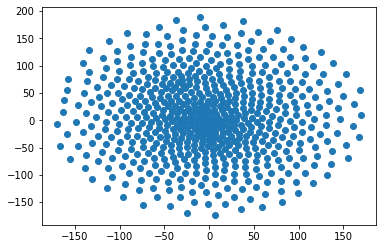

In [41]:
emb_df = pd.DataFrame(emb, columns=['x', 'y'], index=df_sim_capped.index)
plt.scatter(emb_df['x'], emb_df['y'])

What are the words that have the lowest mean similarity to other words?

In [48]:
avg_sim = df_sim.apply([np.mean, np.std, np.median], axis=1)
avg_sim = avg_sim.reset_index().merge(df_issues, left_on='index', right_on = 'query').set_index('index')
avg_sim.sort_values('mean').head(30)

,mean,std,median,Unnamed: 0,query,issue,category,vocab
index,,,,,,,,
lhbtq,-0.015762,0.108055,-0.027562,26502,lhbtq,vrijheidsrechten,expanded,True
BLM,0.031909,0.158821,0.046113,26474,BLM,vrijheidsrechten,original,False
lhbti,0.040675,0.088555,0.031845,26501,lhbti,vrijheidsrechten,expanded,True
lhbtqia,0.114443,0.096114,0.112865,26505,lhbtqia,vrijheidsrechten,expanded,True
lgbtq,0.139052,0.143336,0.149828,26494,lgbtq,vrijheidsrechten,expanded,True
lhbtqi,0.147483,0.090592,0.144837,26503,lhbtqi,vrijheidsrechten,expanded,True
lgbti,0.220908,0.074569,0.219369,26495,lgbti,vrijheidsrechten,expanded,True
zwarte piet,0.222313,0.071611,0.227459,26966,zwarte piet,vrijheidsrechten,original,False
lhbt,0.233936,0.100743,0.231681,26500,lhbt,vrijheidsrechten,expanded,True
